In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use("ggplot")

## Titianic Data Cleaning

### 导入数据


In [3]:
train = pd.read_csv("traintitian.csv")
test = pd.read_csv("test.csv")

### 查看数据类型 info（）

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 合并数据集

In [7]:
new_data = train.append(test,ignore_index = True)
df = new_data


In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
print("The dimension of the new data set" , new_data.shape)

The dimension of the new data set (1309, 12)


# 数据预处理
### 1. 缺失数据 （删除；填充）

In [10]:
new_data.isnull().sum() #查看缺失数据

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
missing = new_data.isnull()

### 2. 重复值

In [12]:
new_data.duplicated().sum() #数据没有重复值，每一列数据完完全全相同

0

In [13]:
print("Total missing data :", new_data.isnull().sum().sum())

Total missing data : 1698


### 3. 字段改名

In [14]:
colNameDic = {'Age':'age'}
new_data.rename(columns = colNameDic,inplace=True)

In [15]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 年龄缺失百分比

In [16]:
print('"age" 缺失的百分比  %.2f%%' %((new_data['age'].isnull().sum()/new_data.shape[0])*100)) ## shape == dim
data = new_data.copy()

"age" 缺失的百分比  20.09%


### 年龄分布情况

(-10.0, 85.0)

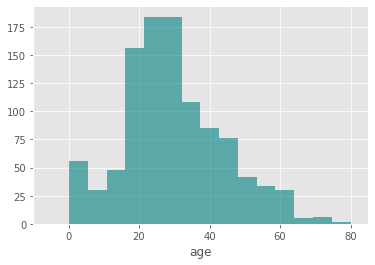

In [17]:
ax = new_data["age"].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='age')
plt.xlim(-10,85)



### 由于“年龄”的偏度不为0, 使用均值替代缺失值不是最佳选择, 这里可以选择使用中间值替代缺失值

In [18]:
# 年龄的均值
print('The mean of "Age" is %.2f' %(new_data["age"].mean(skipna=True)))
# 年龄的中间值
print('The median of "Age" is %.2f' %(new_data["age"].median(skipna=True)))

The mean of "Age" is 29.88
The median of "Age" is 28.00


### 仓位数据

In [19]:
# 仓位缺失的百分比
print('"Cabin" 缺失的百分比 %.2f%%' %((df['Cabin'].isnull().sum()/df.shape[0])*100))

"Cabin" 缺失的百分比 77.46%


### 登船地点

In [20]:
# 登船地点的缺失率
print('"Embarked" 缺失的百分比 %.2f%%' %((df['Embarked'].isnull().sum()/df.shape[0])*100))

"Embarked" 缺失的百分比 0.15%


按照登船地点分组 (C = Cherbourg, Q = Queenstown, S = Southampton):
S    914
C    270
Q    123
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

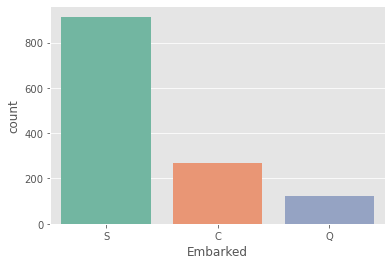

In [21]:
print('按照登船地点分组 (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(new_data['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df, palette='Set2')

In [22]:
print('乘客登船地点的众数为 %s.' %df['Embarked'].value_counts().idxmax())



乘客登船地点的众数为 S.


### 数据填充 （Number or String）
#### 缺失值填充fillna; 删除缺失值 dropna

In [23]:
# 数值类型缺失值使用平均数来填充缺失值
#年龄(Age)
new_data['age']=new_data['age'].fillna( df['age'].mean() )
#船票价格(Fare)
new_data['Fare'] = new_data['Fare'].fillna( df['Fare'].mean() )

In [24]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Carbin缺失数据太多，删除这一列

In [25]:
new_data.drop('Cabin',axis=1,inplace=True)

### 字符串类型

In [26]:
new_data["Embarked"].fillna(new_data['Embarked'].value_counts().idxmax(), inplace=True)

In [27]:
new_data.isnull().sum() ##查看清洗后缺失值

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

# 特征处理

In [28]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


(-10.0, 85.0)

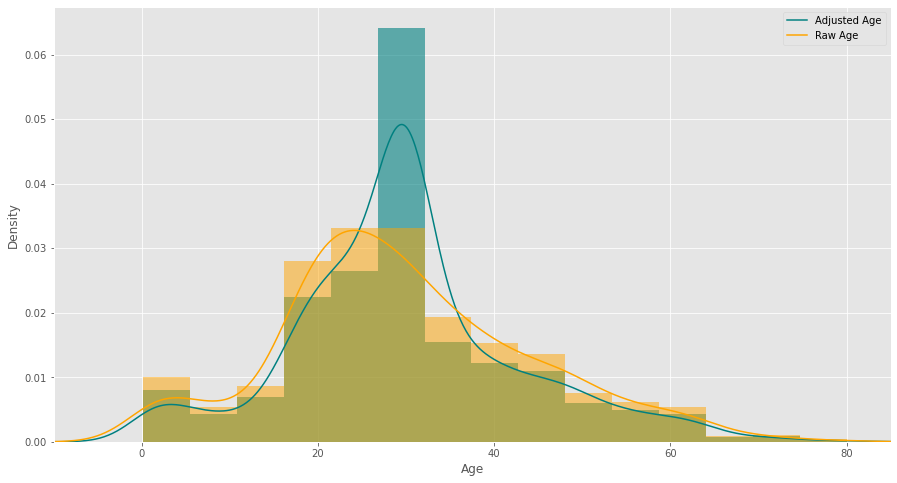

In [29]:
plt.figure(figsize=(15,8))
ax = new_data["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
new_data["age"].plot(kind='density', color='teal')
ax = data["age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
data["age"].plot(kind='density', color='orange')
ax.legend(['Adjusted Age', 'Raw Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)

### 数据中的两个特征 “sibsp” (一同登船的兄弟姐妹或者配偶数量)与“parch”(一同登船的父母或子女数量)都是代表是否有同伴同行. 为了预防这两个特征可能的多重共线性, 我们可以将这两个变量转为一个变量 “TravelAlone” (是否独自一人成行)



In [30]:
Travel_alone = new_data[(new_data["SibSp"] == 0) & (new_data["Parch"] == 0)]

In [31]:
Travel_alone.head()

,PassengerId,Survived,Pclass,Name,Sex,age,SibSp,Parch,Ticket,Fare,Embarked
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0.0,3,"Moran, Mr. James",male,29.881138,0,0,330877,8.4583,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,S


In [32]:
new_data['TravelAlone']=np.where((data["SibSp"]+data["Parch"])>0,0,1)
new_data.drop(["SibSp","Parch"],axis=1,inplace = True)
new_data.drop(['Ticket','Name'],axis=1,inplace = True)

In [33]:
new_data.head()


,PassengerId,Survived,Pclass,Sex,age,Fare,Embarked,TravelAlone
0,1,0.0,3,male,22.0,7.2500,S,0
1,2,1.0,1,female,38.0,71.2833,C,0
2,3,1.0,3,female,26.0,7.9250,S,1
3,4,1.0,1,female,35.0,53.1000,S,0
4,5,0.0,3,male,35.0,8.0500,S,1


### 对类别变量(categorical variables)使用独热编码(One-Hot Encoding), 将字符串类别转换为数值

In [34]:
new_data =pd.get_dummies(new_data, columns=["Embarked","Sex"])

In [35]:
new_data.head()

,PassengerId,Survived,Pclass,age,Fare,TravelAlone,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0.0,3,22.0,7.2500,0,0,0,1,0,1
1,2,1.0,1,38.0,71.2833,0,1,0,0,1,0
2,3,1.0,3,26.0,7.9250,1,0,0,1,1,0
3,4,1.0,1,35.0,53.1000,0,0,0,1,1,0
4,5,0.0,3,35.0,8.0500,1,0,0,1,0,1


## 数据分析

(-10.0, 85.0)

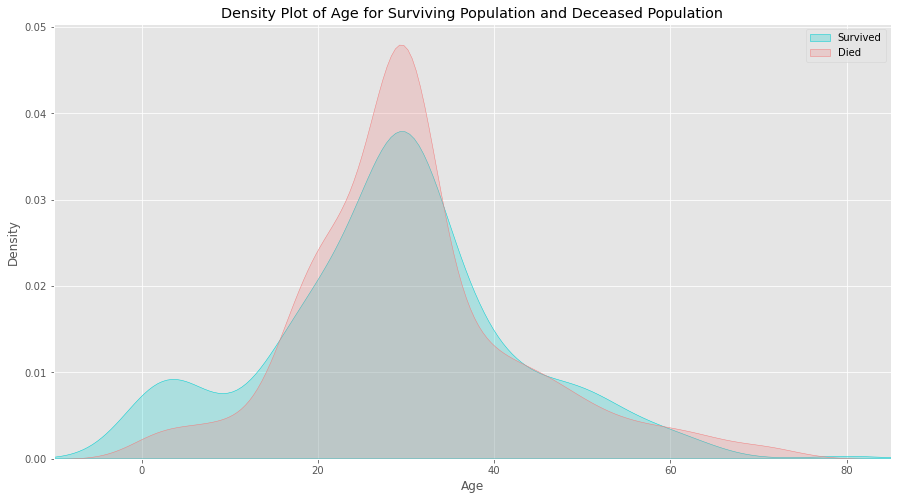

In [36]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(new_data["age"][new_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(new_data["age"][new_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)

## 票价

(-20.0, 200.0)

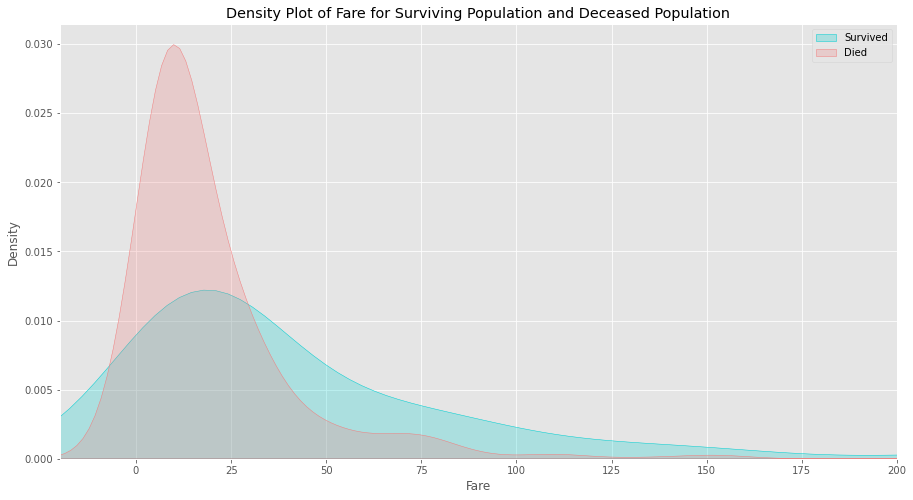

In [37]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(new_data["Fare"][new_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(new_data["Fare"][new_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

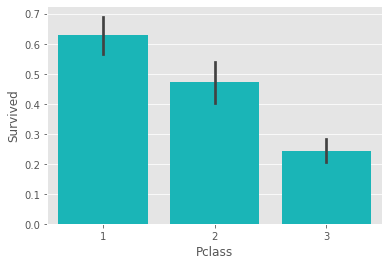

In [38]:
sns.barplot('Pclass', 'Survived', data=new_data, color="darkturquoise")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

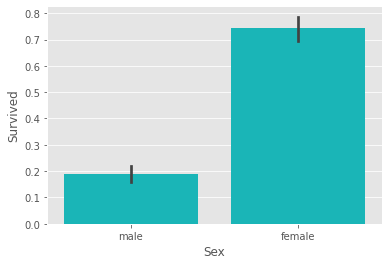

In [39]:
sns.barplot('Sex', 'Survived', data=data, color="darkturquoise")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TravelAlone', ylabel='Survived'>

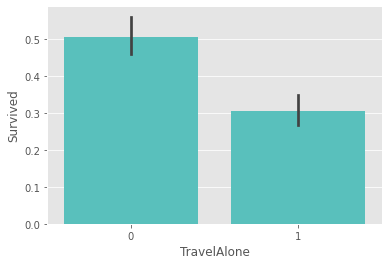

In [40]:
sns.barplot('TravelAlone', 'Survived', data=new_data, color="mediumturquoise")

## 使用Logistic Regression预测

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [59]:
# 使用如下特征做预测
cols = ["age","Fare","TravelAlone","Pclass","Embarked_C","Embarked_S","Sex_male"] 

In [60]:
data1 = new_data.copy()

In [61]:
# 创建 X (特征) 和 y (类别标签)
data1.isnull().sum()
data1 = data1.dropna()
data1.drop('PassengerId',axis=1,inplace=True)
X = data1[cols]
y = data1['Survived']

In [62]:
data1.corr()

,Survived,Pclass,age,Fare,TravelAlone,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
Survived,1.000000,-0.338481,-0.070323,0.257307,-0.203367,0.168240,0.003650,-0.149683,0.543351,-0.543351
Pclass,-0.338481,1.000000,-0.330367,-0.549500,0.135207,-0.243292,0.221009,0.074053,-0.131900,0.131900
age,-0.070323,-0.330367,1.000000,0.091002,0.180618,0.032210,-0.011969,-0.020685,-0.084461,0.084461
Fare,0.257307,-0.549500,0.091002,1.000000,-0.271832,0.269335,-0.117216,-0.162184,0.182333,-0.182333
TravelAlone,-0.203367,0.135207,0.180618,-0.271832,1.000000,-0.095298,0.086464,0.029074,-0.303646,0.303646
Embarked_C,0.168240,-0.243292,0.032210,0.269335,-0.095298,1.000000,-0.148258,-0.782742,0.082853,-0.082853
Embarked_Q,0.003650,0.221009,-0.011969,-0.117216,0.086464,-0.148258,1.000000,-0.499421,0.074115,-0.074115
Embarked_S,-0.149683,0.074053,-0.020685,-0.162184,0.029074,-0.782742,-0.499421,1.000000,-0.119224,0.119224
Sex_female,0.543351,-0.131900,-0.084461,0.182333,-0.303646,0.082853,0.074115,-0.119224,1.000000,-1.000000
Sex_male,-0.543351,0.131900,0.084461,-0.182333,0.303646,-0.082853,-0.074115,0.119224,-1.000000,1.000000


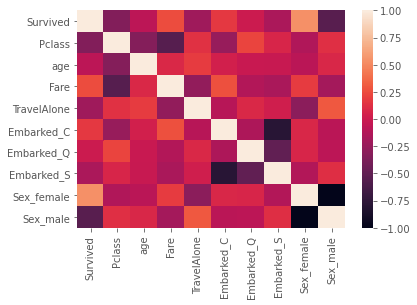

In [63]:
sns.heatmap(data1.corr());

In [64]:
# 将 X 和 y 分为两个部分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 检测 logistic regression 模型的性能
# TODO 添加代码:
# 1.训练模型,  
# 2.根据模型, 以 X_test 为输入, 生成变量 y_pred



In [66]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [68]:
y_pred = logreg.predict(X_test)

In [69]:
print('Train/Test split results:')
print("准确率为 %2.3f" % accuracy_score(y_test, y_pred))

Train/Test split results:
准确率为 0.765


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       100
         1.0       0.78      0.65      0.71        79

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.76       179



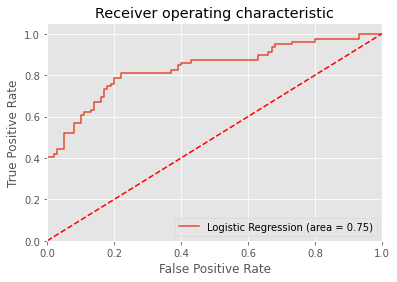

In [71]:
#ROC曲线
#曲线下方所围面积越大，分类效果越好

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")